##Business Problem
I'm going to demonstrate how the Tsetlin Machine can improve the accuracy of detecting fraudulent transactions. I'll also compare its effectiveness with other common machine learning models.


In [ ]:
!cat /proc/cpuinfo | grep 'model name' | uniq


model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('This notebook is not connected to a GPU.')
else:
    print('Found GPU at: {}'.format(device_name))
    !nvidia-smi


This notebook is not connected to a GPU.


In [ ]:
!cat /proc/meminfo | grep 'MemTotal'


MemTotal:       13290452 kB


Dataset:
Here is the dataset I took from the Kaggle:  https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models/input

In [ ]:
!pip install PyTsetlinMachine

  Preparing metadata (setup.py) ... done
  Created wheel for PyTsetlinMachine: filename=pyTsetlinMachine-0.6.6-cp310-cp310-linux_x86_64.whl size=59500 sha256=90dcb741d76e573b2dccd4e07d79fbe7a136181d1cf49bd78ff56fa76031e8b6
  Stored in directory: /root/.cache/pip/wheels/b0/b0/c5/07c4cb8bb93c5325bdc2c2a070b565f54df717d5d11f0c6802
Successfully built PyTsetlinMachine


#Libraries to be Imported


In [ ]:
# import pandas as pd # For data manupulation
# import numpy as np # For numeric computation
# import matplotlib.pyplot as plt
# import math
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score
# from sklearn.metrics import confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
#POINT TO REMEMBER 





from pyTsetlinMachine.tm import MultiClassTsetlinMachine

##Uploading the dataset


In [ ]:
df = pd.read_csv("/content/creditcard.csv",delimiter=';')
df.head()

<ipython-input-6-f419979d9558>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/creditcard.csv",delimiter=';')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
2,1,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
3,1,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-117.557.533.186.321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.50,0
4,2,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.213454108437359,0.111863735978609,101.447.989.719.391,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0
284803,172787,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.214205341747019,0.924383584903381,0.0124630383316793,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0
284804,172788,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.232045035925397,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0
284805,172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.265244916386865,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0
284806,172792,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,0.261057330790975,0.643078437820093,0.376777014169917,0.00879737940024202,-0.473648703898825,-0.818267121041176,-0.00241530880001015,0.0136489143320671,217.00,0


In [ ]:
print(df['Time'].head())



0    0
1    0
2    1
3    1
4    2
Name: Time, dtype: object


##Exploaring the dataset

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  object 
 1   V1      284807 non-null  object 
 2   V2      284807 non-null  object 
 3   V3      284807 non-null  object 
 4   V4      284807 non-null  object 
 5   V5      284807 non-null  object 
 6   V6      284807 non-null  object 
 7   V7      284807 non-null  object 
 8   V8      284807 non-null  object 
 9   V9      284807 non-null  object 
 10  V10     284807 non-null  object 
 11  V11     284807 non-null  object 
 12  V12     284807 non-null  object 
 13  V13     284807 non-null  object 
 14  V14     284807 non-null  object 
 15  V15     284807 non-null  object 
 16  V16     284807 non-null  object 
 17  V17     284807 non-null  object 
 18  V18     284807 non-null  object 
 19  V19     284807 non-null  object 
 20  V20     284807 non-null  object 
 21  V21     28

##To check for Null Values


In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


##Highlights
*   The dataset is having 284807 transactions with 31 features.
*   No missing values and all the datatypes are float except for class
*   3 columns I am going to use for analysis for Time, Amount & Class.


In [ ]:
print(df['V1'].sample(5))
print(df['V2'].sample(5))

194735    214.039.676.423.584
131806      0.212311540053812
162593    210.977.648.567.961
213362    204.996.158.255.902
202102      0.179836748880821
Name: V1, dtype: object
222952    114.923.615.573.049
68418      -0.170577618279684
48069      -0.310060903533788
242073    115.945.365.074.353
208635      0.248242351596989
Name: V2, dtype: object


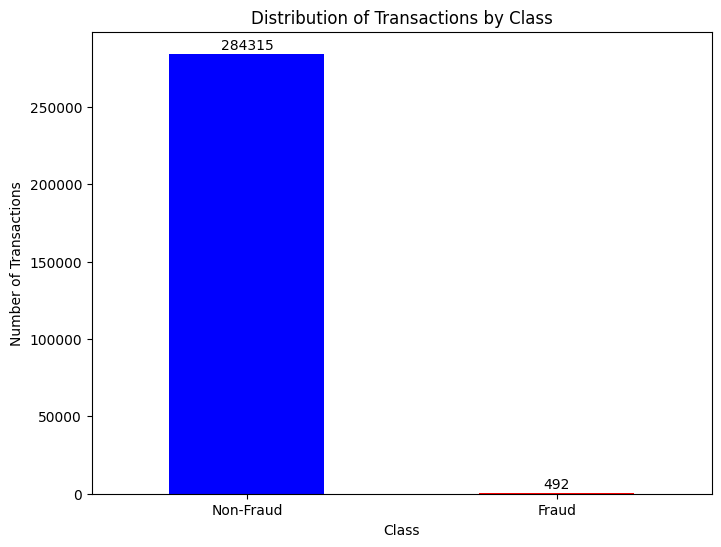

In [ ]:

# Count the number of fraud and non-fraud transactions
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'], rotation=0)

# Add count labels on top of each bar
for i, count in enumerate(class_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
len(df)

284807

In [ ]:
len(df[df['Class']==1])

492

In [ ]:
len(df[df['Class']==0])

284315

In [ ]:
df.to_csv("/content/Balanced_Dataset.csv")

## Insights
The dataset is highly imbalanced, its contains 284315 non fraud transactions and 492 fraud, Now based on this dataframe our model will predict all the transactions are not fraud because it will overfit.

In [ ]:
#Lets check the description of the data
df[['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [ ]:
df[['Time']].describe()

,Time
count,284807
unique,124593
top,163152
freq,36


In [ ]:
df[['Class']].describe()

,Class
count,284807.000000
mean,0.001727
std,0.041527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
print(df['Time'].tail())


284802    172786
284803    172787
284804    172788
284805    172788
284806    172792
Name: Time, dtype: object


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.213454108437359,0.111863735978609,101.447.989.719.391,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0
284803,172787,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.214205341747019,0.924383584903381,0.0124630383316793,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0
284804,172788,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.232045035925397,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0
284805,172788,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.265244916386865,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0
284806,172792,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,0.261057330790975,0.643078437820093,0.376777014169917,0.00879737940024202,-0.473648703898825,-0.818267121041176,-0.00241530880001015,0.0136489143320671,217.00,0


In [ ]:
# Check the data type of the 'Time' column
print(df['Time'].dtype)

# Check the unique values in the 'Time' column
print(df['Time'].unique())

object
[0 1 2 ... 172787 172788 172792]


It seems like the Time values in the time column are stored as objects, it should be generally stored as Numeric value, so that can get the description of the "Time" column

In [ ]:
# Convert 'Time' to numeric, forcing errors to NaN
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Converting 'Time' from seconds to hours
df['Time'] = df['Time'].apply(lambda sec: sec / 3600)



In [ ]:
time_description = df['Time'].describe()

# Print the descriptive statistics
print(time_description)

count    284806.000000
mean         26.337178
std          13.191175
min           0.000000
25%          15.055903
50%          23.525417
75%          38.700208
max          47.997778
Name: Time, dtype: float64


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.213454108437359,0.111863735978609,101.447.989.719.391,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0
284803,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.214205341747019,0.924383584903381,0.0124630383316793,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0
284804,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.232045035925397,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0
284805,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.265244916386865,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0
284806,47.997778,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,0.261057330790975,0.643078437820093,0.376777014169917,0.00879737940024202,-0.473648703898825,-0.818267121041176,-0.00241530880001015,0.0136489143320671,217.00,0


In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0.000000,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
2,0.000278,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
3,0.000278,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-117.557.533.186.321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.50,0
4,0.000556,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


So from this we can see that "94814" represents the mean or average time elapsed between transactions in your dataset. Specifically, it indicates that, on average, a transaction occurs approximately every 94,814 seconds.

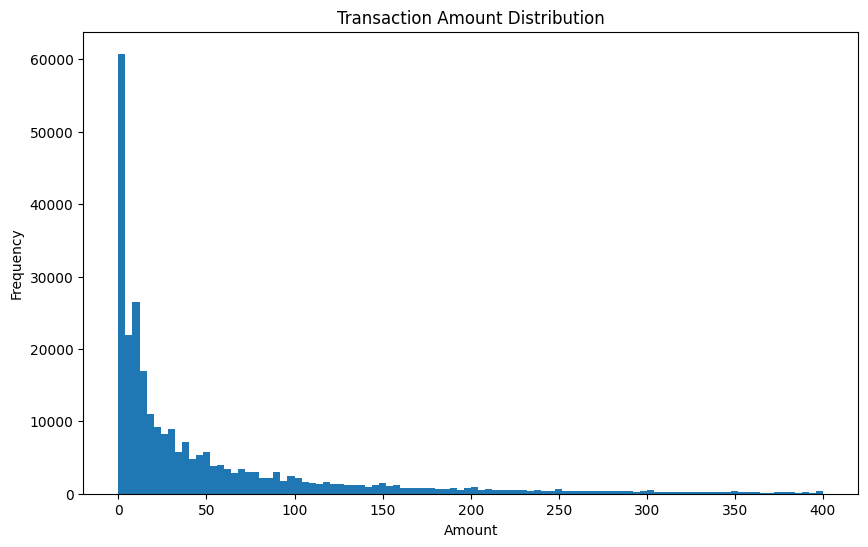

In [ ]:
# Histogram of the original 'Amount' data
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=100, range=(0, 400))
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

##Insights

So most of the Transactions are clustered between 0-3000, shows that these transactions are of small amount, and are very few large transactions. It might make sense to drop the outliers.

<ipython-input-29-6cc836b2cb14>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 1]['Amount'], bins=200, ax=axs[0])  # Increased bins from 100 to 200
<ipython-input-29-6cc836b2cb14>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class'] == 0]['Amount'], bins=200, ax=ax

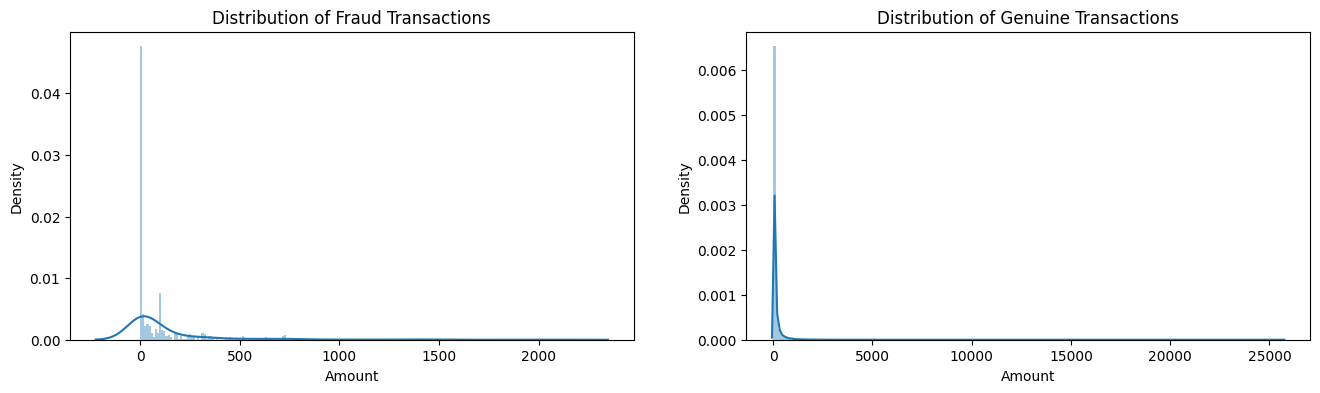

In [ ]:


# Create subplots
fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

# Distribution of Fraud Transactions
sns.distplot(df[df['Class'] == 1]['Amount'], bins=200, ax=axs[0])  # Increased bins from 100 to 200
axs[0].set_title("Distribution of Fraud Transactions")

# Distribution of Genuine Transactions
sns.distplot(df[df['Class'] == 0]['Amount'], bins=200, ax=axs[1])  # Increased bins from 100 to 200
axs[1].set_title("Distribution of Genuine Transactions")

# Show plot
plt.show()


#fig, axs = plt.subplots(ncols=2, figsize=(16, 4))

# Increase the number of bins and ensure that the x-axis labels are visible
#bins = 500

# Distribution of Fraud Transactions
#sns.histplot(df[df['Class'] == 1]['Amount'], bins=bins, kde=True, ax=axs[0])
#axs[0].set_title("Distribution of Fraud Transactions")
#axs[0].set_xlim([0, 400])  # Adjust the x-axis limit if necessary

# Distribution of Genuine Transactions
#sns.histplot(df[df['Class'] == 0]['Amount'], bins=bins, kde=True, ax=axs[1])
#axs[1].set_title("Distribution of Genuine Transactions")
#axs[1].set_xlim([0, 5000])  # Adjust the x-axis limit if necessary

# Show plot
#plt.tight_layout()
#plt.show()




The graph shows that most of the fraud transactions occured is in between 0-500. And the intensity is hight for that. Now I will try to find out the Maximum and minimum fraud transactions.

In [ ]:
# Maximum and minimum amounts for fraudulent transactions
max_fraud = df[df['Class'] == 1]['Amount'].max()
min_fraud = df[df['Class'] == 1]['Amount'].min()

# Maximum and minimum amounts for genuine transactions
max_genuine = df[df['Class'] == 0]['Amount'].max()
min_genuine = df[df['Class'] == 0]['Amount'].min()

print("Fraud Transaction distribution:\n", df[df['Class'] == 1]['Amount'].value_counts().head())
print("\nMaximum amount of fraud transaction - ", max_fraud)
print("Minimum amount of fraud transaction - ", min_fraud)

print("\nGenuine Transaction distribution:\n", df[df['Class'] == 0]['Amount'].value_counts().head())
print("\nMaximum amount of Genuine transaction - ", max_genuine)
print("Minimum amount of Genuine transaction - ", min_genuine)

Fraud Transaction distribution:
 Amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64

Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0

Genuine Transaction distribution:
 Amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64

Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


So from the data,

Distribution of Amount With respect to Class

<ipython-input-31-d6491202d675>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['green', 'red'])


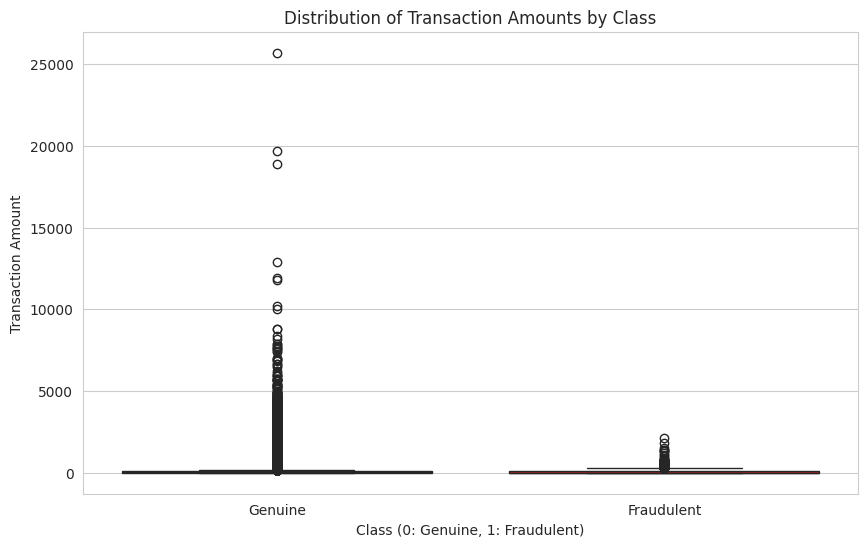

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['green', 'red'])
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Class (0: Genuine, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.yscale('linear')  # Set scale to linear to match the provided image
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])  # Set the x-axis labels to be more descriptive

# Display the plot
plt.show()


##Insights
Its interesting to see that most of the geniune transaction occured between 0-3000 and then there are outliers, which I will be removing it for my further analysis. However I have to be careful and not remove the outliers from the Fraud transaction, since this will be used to build the model for prediction.

In [ ]:
#import math
# Ensure 'Time' is numeric
#df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# Convert 'Time' into hours
#df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

# Calculate the hour of the day and round it
#df['Hour_of_day'] = df['Time'] % 24
#df['Hour_of_day'] = df['Hour_of_day'].fillna(0).apply(lambda x : math.floor(x))

#df.head()

In [ ]:
import math

# Calculate the hour of the day
df['Hour_of_day'] = df['Time'] % 24

# Fill NaN values with 0 and round the 'Hour_of_day' to the nearest whole number
df['Hour_of_day'] = df['Hour_of_day'].fillna(0).apply(lambda x: math.floor(x))
df.tail()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour_of_day
284802,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.111863735978609,101.447.989.719.391,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0,23
284803,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.924383584903381,0.0124630383316793,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0,23
284804,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0,23
284805,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0,23
284806,47.997778,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,0.643078437820093,0.376777014169917,0.00879737940024202,-0.473648703898825,-0.818267121041176,-0.00241530880001015,0.0136489143320671,217.00,0,23


In [ ]:
# Display the first few rows to verify the conversion
print(df[['Time', 'Hour_of_day']].head())

       Time  Hour_of_day
0  0.000000            0
1  0.000000            0
2  0.000278            0
3  0.000278            0
4  0.000556            0


In [ ]:
# Inspect the original Time column
print(df['Time'].describe())

# Check unique values in the Time column
print(df['Time'].unique()[:10])  # Display first 10 unique values

count    284806.000000
mean         26.337178
std          13.191175
min           0.000000
25%          15.055903
50%          23.525417
75%          38.700208
max          47.997778
Name: Time, dtype: float64
[0.         0.00027778 0.00055556 0.00111111 0.00194444 0.0025
 0.00277778 0.00305556 0.00333333 0.00361111]


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour_of_day
284802,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.111863735978609,101.447.989.719.391,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0,23
284803,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,0.924383584903381,0.0124630383316793,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0,23
284804,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.57822900992263,-0.0375008550221367,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0,23
284805,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.800048741498139,-0.163297944406659,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0,23
284806,47.997778,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,0.643078437820093,0.376777014169917,0.00879737940024202,-0.473648703898825,-0.818267121041176,-0.00241530880001015,0.0136489143320671,217.00,0,23


Now I will dive into the exploration of the distribution of the Time


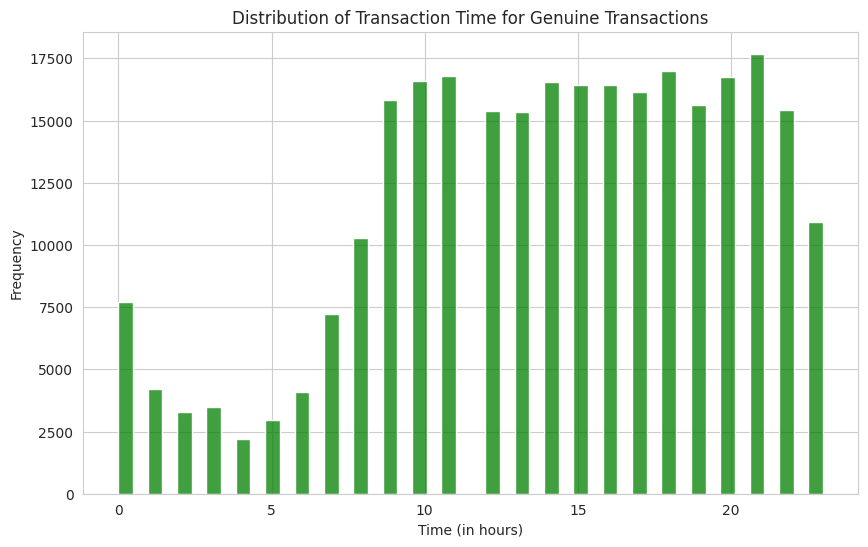

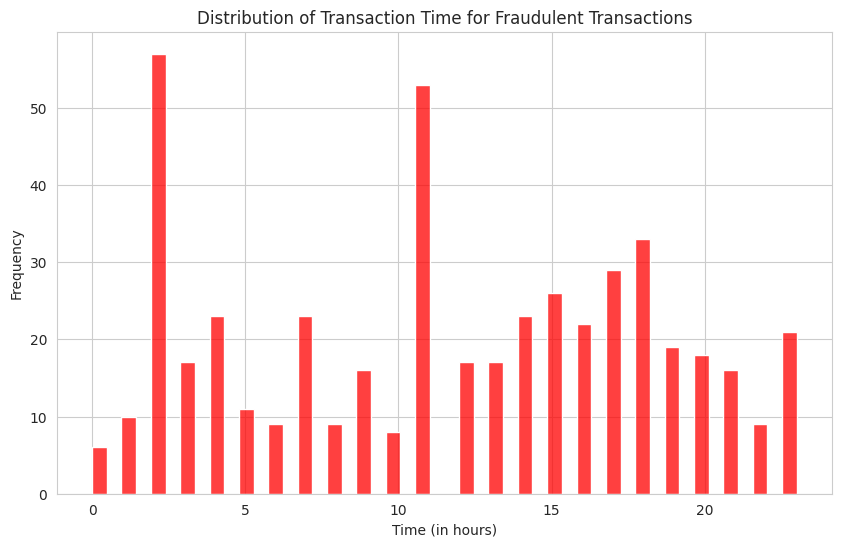

In [ ]:


# Setting the aesthetic style of the plots
sns.set_style('whitegrid')

# Ploting  histogram for genuine transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Hour_of_day'], kde=False, bins=48, color='green')
plt.title('Distribution of Transaction Time for Genuine Transactions')
plt.xlabel('Time (in hours)')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 1]['Hour_of_day'], kde=False, bins=48, color='red')
plt.title('Distribution of Transaction Time for Fraudulent Transactions')
plt.xlabel('Time (in hours)')
plt.ylabel('Frequency')
plt.show()

so from the graph we can see when it comes to the distribution of the geniune transaction it seems uniform and peaks here could mean that they were during the day time where generally the transaction can happen.
On the other hand the fraud transaction are happening uniformly no clear pattern of the time distribution.

<ipython-input-38-1af6b562e1b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Hour_of_day', data=df, palette=['#1f77b4', '#ff7f0e'])


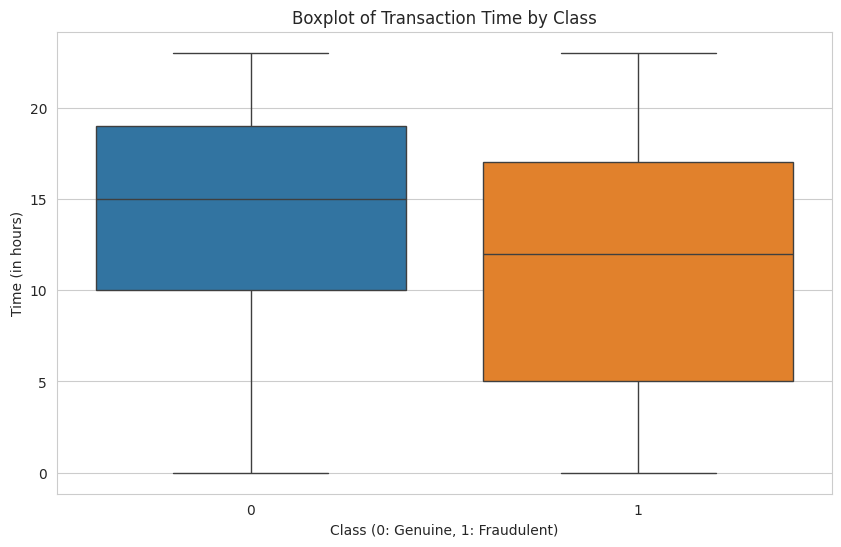

In [ ]:
# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Hour_of_day', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Boxplot of Transaction Time by Class')
plt.xlabel('Class (0: Genuine, 1: Fraudulent)')
plt.ylabel('Time (in hours)')
plt.show()

From this Boxplot I can say that the time is not a strong factor here since the

---

0 & 1 class are overlapping.

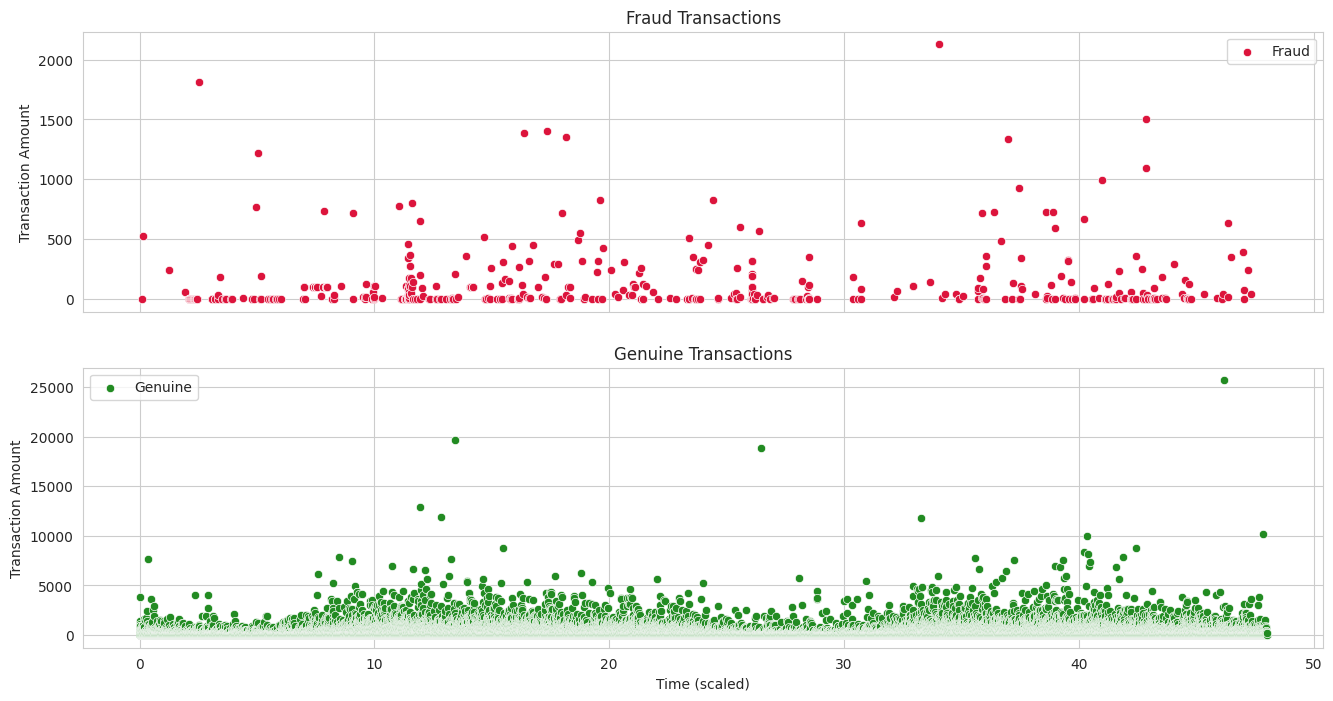

In [ ]:


# Set up the plotting area
fig, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

# Scatter plots for fraud and genuine transactions
sns.scatterplot(ax=axes[0], x='Time', y='Amount', data=df[df['Class'] == 1], color='crimson', label='Fraud')
axes[0].set_title('Fraud Transactions')
sns.scatterplot(ax=axes[1], x='Time', y='Amount', data=df[df['Class'] == 0], color='forestgreen', label='Genuine')
axes[1].set_title('Genuine Transactions')

# Set common labels
for ax in axes:
    ax.set_ylabel('Transaction Amount')
plt.xlabel('Time (scaled)')
plt.show()



from the output: Fraud transactions tends to have lower amounts like 0-500 and not so dense and sparsly distributed while on the other hand, the geniune transactions are densly packed.

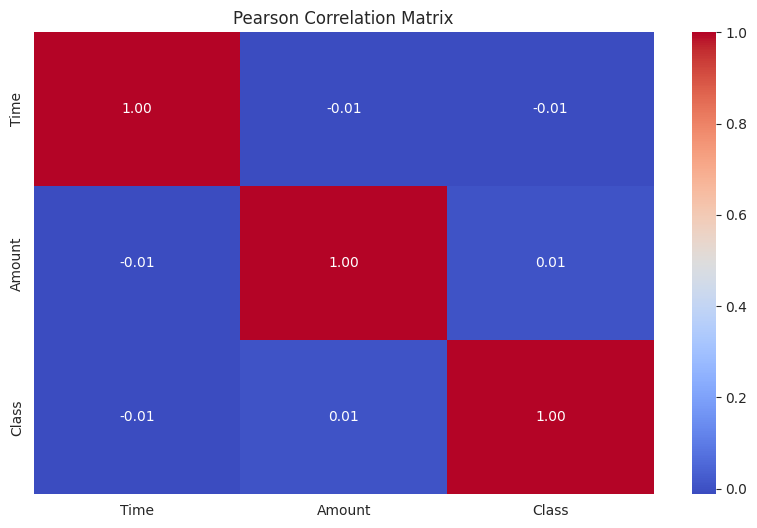

In [ ]:
# Convert columns to numeric, setting errors='coerce' will convert non-convertible values to NaN
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

# Drop rows with NaN values that resulted from conversion issues
df.dropna(inplace=True)

# Calculate the correlation matrix again
corr = df[['Time', 'Amount', 'Class']].corr()

# Generate a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

So here I first had to convert all the data  all data in my numerical columns (time, amount, class) are in the correct format (i.e., as numbers).
Thne I plotted the matrix and from the output I can tell that non of the features are that much corelated.

Now lets handle the missing values

In [ ]:
print(df.isnull().sum())

Time           0
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount         0
Class          0
Hour_of_day    0
dtype: int64


This output shows that I dont have any missing values which means I can proceed with the further analysis

In [ ]:
# Calculating Q1 and Q3
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Number of outliers:", len(outliers))



Number of outliers: 31904


I am going to keep the outliers as they could be indicative of fraudulent transactions which are crucial for the analysis. Since the fraud detection relies on outliers. I think excluding these outliers could potentially eliminate some important patterns related to the fraud transaction activities.

In [ ]:
df['Part_of_Day'] = pd.cut(df['Hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Creating bins for transaction amount
df['Amount_bins'] = pd.cut(df['Amount'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
# Check the new columns added
print(df[['Hour_of_day', 'Part_of_Day', 'Amount_bins']].head())




   Hour_of_day Part_of_Day Amount_bins
0            0       Night      Medium
1            0       Night         Low
2            0       Night      Medium
3            0       Night      Medium
4            0       Night         Low


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Hour_of_day,Part_of_Day,Amount_bins
0,0.000000,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,0,Night,Medium
1,0.000000,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0,0,Night,Low
2,0.000278,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,0,Night,Medium
3,0.000278,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,-117.557.533.186.321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.50,0,0,Night,Medium
4,0.000556,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,0,Night,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,-0.509348453168509,14.368.069.070.214,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0,23,Evening,Low
284803,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,-101.622.566.867.336,-0.606623985854728,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0,23,Evening,Low
284804,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,0.640133881346421,0.265745453243744,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0,23,Evening,Low
284805,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.123205243742508,-0.569158864158597,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0,23,Evening,Low


In [ ]:
max_time_in_hours = df['Hour_of_day'].max()
print("Maximum time in hours:", max_time_in_hours)

Maximum time in hours: 23


In [ ]:
df['Part_of_Day'] = pd.cut(df['Hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Calculating which day the transaction occurred, assuming data starts from day 1
df['Day'] = (df['Time'] / 24).apply(np.floor) + 1




# Creating bins for transaction amount
df['Amount_bins'] = pd.cut(df['Amount'], bins=[0, 100, 500, 1000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Check the new columns added
print(df[['Time','Hour_of_day', 'Part_of_Day', 'Day', 'Amount_bins']].tail())


             Time  Hour_of_day Part_of_Day  Day Amount_bins
284802  47.996111           23     Evening  2.0         Low
284803  47.996389           23     Evening  2.0         Low
284804  47.996667           23     Evening  2.0         Low
284805  47.996667           23     Evening  2.0         Low
284806  47.997778           23     Evening  2.0      Medium


In [ ]:
# Print unique days from the 'Day' column
unique_days = df['Day'].unique()
print("Unique days in data:", unique_days)


Unique days in data: [1. 2.]


Weekday Transactions Summary:
count    144786.000000
mean         90.436748
std         245.908291
min           0.000000
25%           5.990000
50%          23.395000
75%          80.000000
max       19656.530000
Name: Amount, dtype: float64
count    284806.000000
mean         88.349756
std         250.120538
min           0.000000
25%           5.600000
50%          22.000000
75%          77.167500
max       25691.160000
Name: Amount, dtype: float64


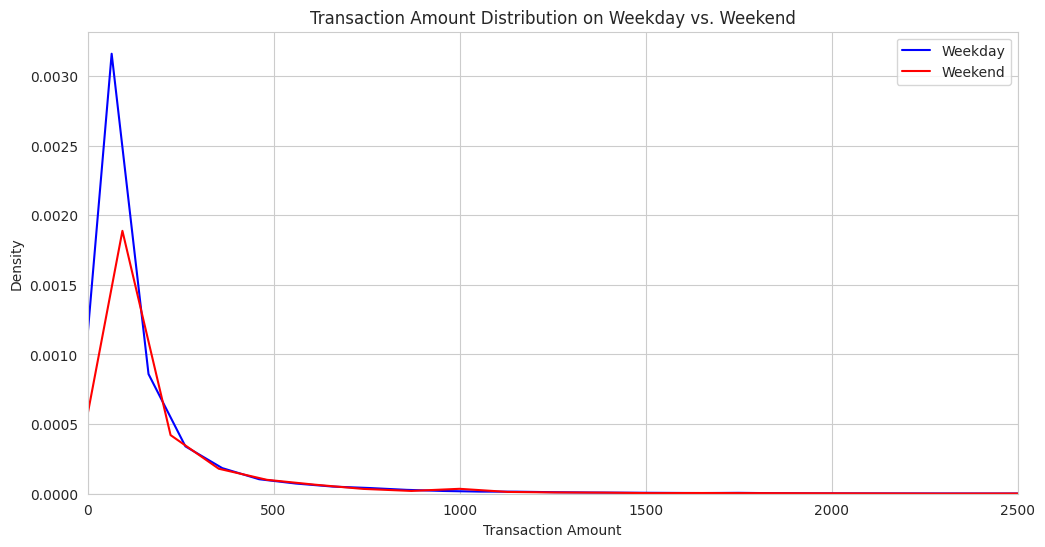

In [ ]:
# Assume Day 1 as a weekday and Day 2 as a weekend for demonstration
df['Weekday_Weekend'] = df['Day'].apply(lambda x: 'Weekday' if x == 1 else 'Weekend')

# Now let's check the distribution of transactions on weekdays vs weekends
weekday_transactions = df[df['Weekday_Weekend'] == 'Weekday']['Amount']
weekend_transactions = df[df['Weekday_Weekend'] == 'Weekend']['Amount']

print("Weekday Transactions Summary:")
print(weekday_transactions.describe())
print(df['Amount'].describe())

# Plotting the transaction amount distribution for weekdays and weekends without log scale
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Weekday_Weekend'] == 'Weekday'], x='Amount', label='Weekday', color='blue', bw_adjust=0.5)
sns.kdeplot(data=df[df['Weekday_Weekend'] == 'Weekend'], x='Amount', label='Weekend', color='red', bw_adjust=0.5)
plt.title('Transaction Amount Distribution on Weekday vs. Weekend')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.xlim([0, 2500])  # Setting x-limits to focus on lower transaction amounts, adjust as necessary based on your data
plt.legend()
plt.show()

## Insights
For this analysis, we categorized transactions into weekdays and weekends based on the assumption that Day 1 represents a weekday and Day 2 represents a weekend. This classification allowed us to observe distinct transaction patterns between the two.
1. There is a higher number of transactions on weekdays compared to weekends
2. The mean and median transaction amounts are slightly higher on weekdays. This could indicate more substantial commercial transactions typically occurring on weekdays.
3. The density plots show that both weekdays and weekends have a similar distribution shape, with most transactions concentrated at lower amounts. However, weekdays have a slightly higher density at lower amounts, which could imply a larger volume of smaller, routine transactions.

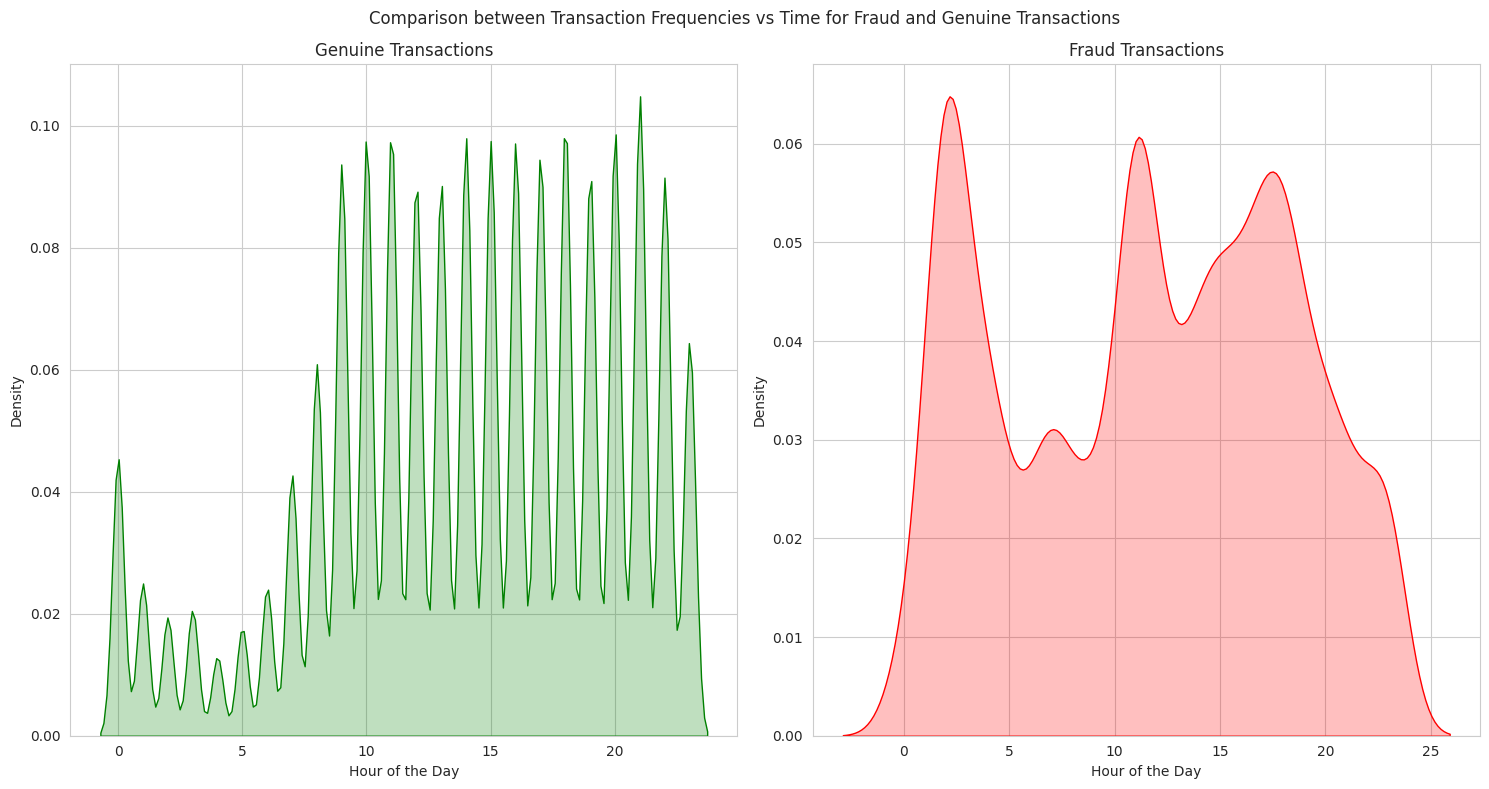

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Adjusting bandwidth and adding more granularity to the KDE plot can help in making the distribution clearer.
sns.kdeplot(df[df['Class']==0]['Hour_of_day'], bw_adjust=0.5, color='green', ax=axs[0], fill=True)
axs[0].set_title('Genuine Transactions')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Density')

sns.kdeplot(df[df['Class']==1]['Hour_of_day'], bw_adjust=0.5, color='red', ax=axs[1], fill=True)
axs[1].set_title('Fraud Transactions')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Density')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

So in my analysis, I didvided the transactions into genuine and fraudulent categories and examined their frequencies across different hours of the day using a kernel density estimation (KDE) plot. The resulting visualization shows distinct patterns for each category. Genuine transactions peak during typical business hours, suggesting higher activity when people are most likely to engage in financial transactions. On the other hand fraudulent transactions display peaks at specific, possibly strategic times, indicating potential periods of increased fraud risk.

##Insight
The graph shows that the genine transaction even by hour are generally consistent whereas the fraud transactions are kind of varries with significant peaks at certain hours.

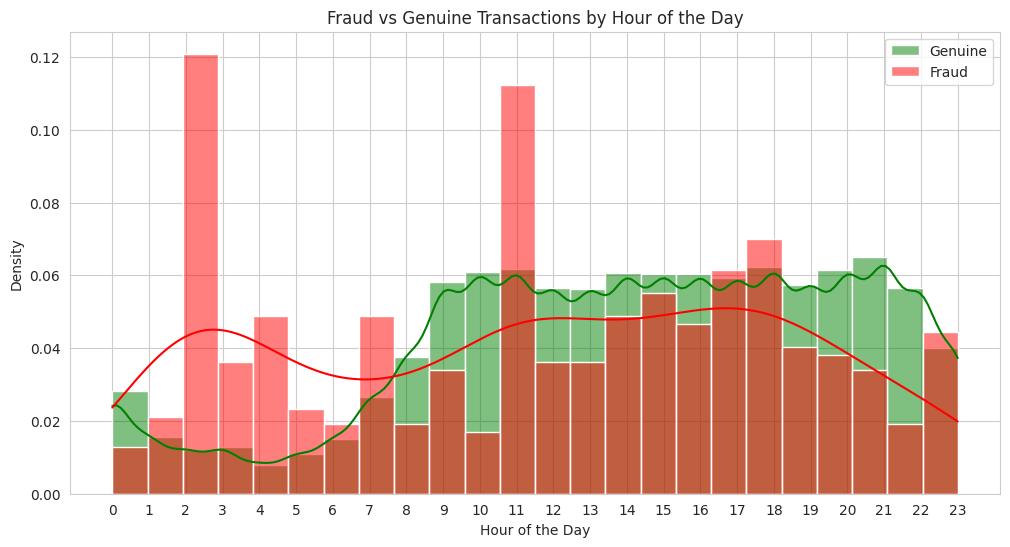

In [ ]:
# Plot the distribution of transactions by hour of the day
plt.figure(figsize=(12, 6))

# Plot for genuine transactions
sns.histplot(data=df[df['Class'] == 0], x='Hour_of_day', bins=24, kde=True, color='green', label='Genuine', stat='density', common_norm=False)

# Plot for fraudulent transactions
sns.histplot(data=df[df['Class'] == 1], x='Hour_of_day', bins=24, kde=True, color='red', label='Fraud', stat='density', common_norm=False)

plt.title('Fraud vs Genuine Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
plt.xticks(range(24))
plt.legend()
plt.show()

##Transaction amounts by time of the day








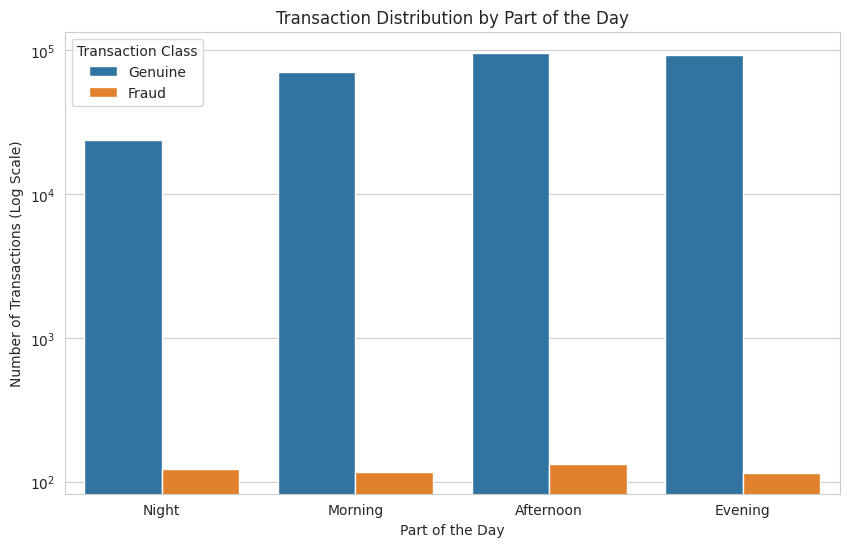

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Part_of_Day', hue='Class', data=df)
plt.yscale('log')
plt.title("Transaction Distribution by Part of the Day")
plt.xlabel("Part of the Day")
plt.ylabel("Number of Transactions (Log Scale)")
plt.legend(title="Transaction Class", labels=["Genuine", "Fraud"])
plt.show()


In [ ]:
df



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Hour_of_day,Part_of_Day,Amount_bins,Day,Weekday_Weekend
0,0.000000,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0,0,Night,Medium,1.0,Weekday
1,0.000000,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0,0,Night,Low,1.0,Weekday
2,0.000278,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0,0,Night,Medium,1.0,Weekday
3,0.000278,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.50,0,0,Night,Medium,1.0,Weekday
4,0.000556,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0,0,Night,Low,1.0,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.250034279569581,0.943651171507532,0.823730961486502,0.77,0,23,Evening,Low,2.0,Weekend
284803,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,-0.395255065710324,0.0684724700405593,-0.0535273892010011,24.79,0,23,Evening,Low,2.0,Weekend
284804,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,-0.0873705959041059,0.00445477213829229,-0.0265608285615222,67.88,0,23,Evening,Low,2.0,Weekend
284805,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,0.546668462188323,0.108820734744839,0.104532821478796,10.00,0,23,Evening,Low,2.0,Weekend


<ipython-input-53-1e76b0212314>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df, ax=axs[0], palette='deep')
<ipython-input-53-1e76b0212314>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df[df['Class'] == 1], ax=axs[1], palette='deep')
<ipython-input-53-1e76b0212314>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=df[df['Class'] == 0], ax=axs[2], palette='deep')


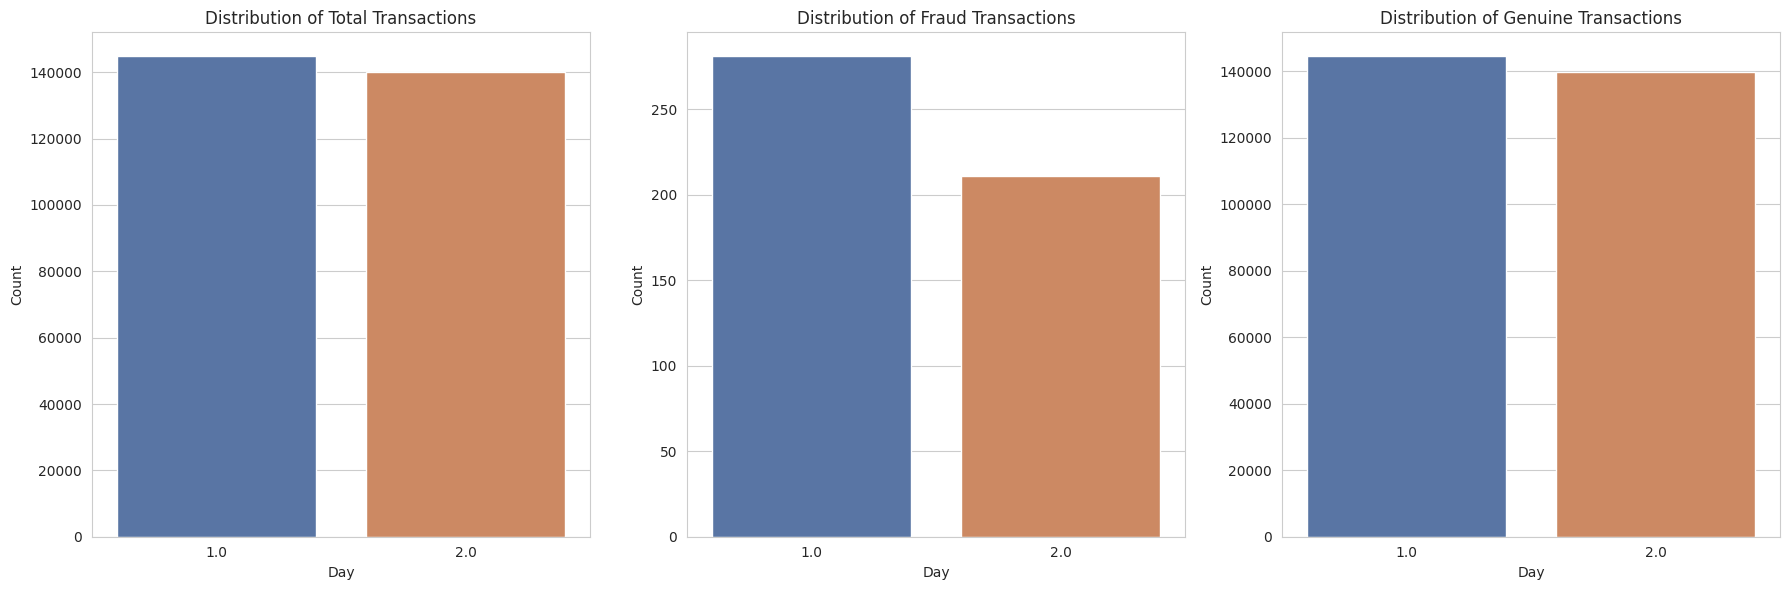

In [ ]:
# Set up the matplotlib figure
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Total Transactions
sns.countplot(x='Day', data=df, ax=axs[0], palette='deep')
axs[0].set_title('Distribution of Total Transactions')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Count')

# Fraud Transactions
sns.countplot(x='Day', data=df[df['Class'] == 1], ax=axs[1], palette='deep')
axs[1].set_title('Distribution of Fraud Transactions')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Count')

# Genuine Transactions
sns.countplot(x='Day', data=df[df['Class'] == 0], ax=axs[2], palette='deep')
axs[2].set_title('Distribution of Genuine Transactions')
axs[2].set_xlabel('Day')
axs[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()





<ipython-input-54-590cd93851d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='autumn')


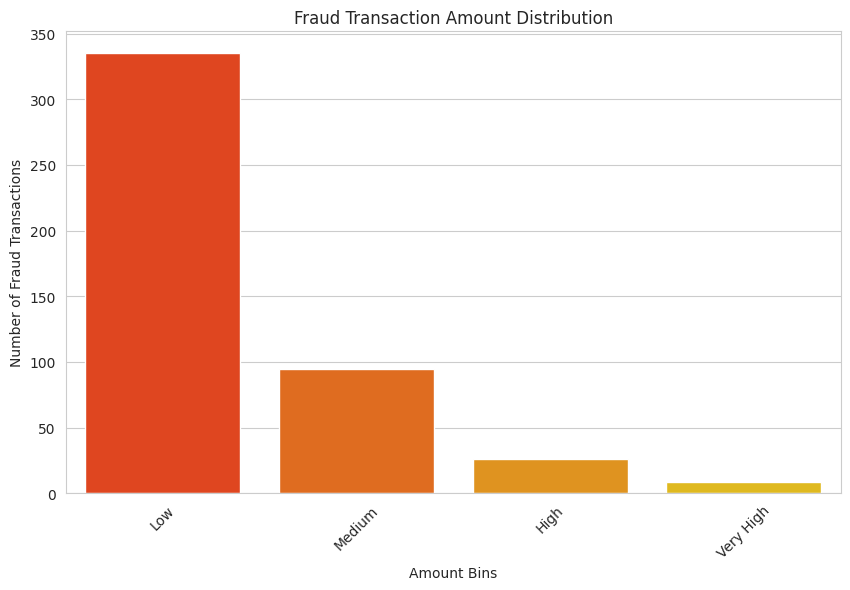

In [ ]:

# Filter the dataset for fraud transactions only
fraud_data = df[df['Class'] == 1]

# Count the number of fraud transactions in each amount bin
fraud_counts = fraud_data['Amount_bins'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='autumn')
plt.title('Fraud Transaction Amount Distribution')
plt.xlabel('Amount Bins')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=45)

plt.show()


In [ ]:
df.reset_index(inplace = True , drop = True)


## Scaling




```
# This is formatted as code
```

#Log Scaling

In [ ]:
# Transforming the 'Amount' with logarithmic scale to reduce skewness
df['Amount_Log'] = np.log(df['Amount'] + 0.0001)  # Adding 1 to avoid log(0)



In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Hour_of_day,Part_of_Day,Amount_bins,Day,Weekday_Weekend,Amount_Log
0,0.000000,-13.598.071.336.738,-0.0727811733098497,253.634.673.796.914,137.815.522.427.443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,0.133558376740387,-0.0210530534538215,149.62,0,0,Night,Medium,1.0,Weekday,5.008099
1,0.000000,119.185.711.131.486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.00898309914322813,0.0147241691924927,2.69,0,0,Night,Low,1.0,Weekday,0.989578
2,0.000278,-135.835.406.159.823,-134.016.307.473.609,177.320.934.263.119,0.379779593034328,-0.503198133318193,180.049.938.079.263,0.791460956450422,0.247675786588991,-151.465.432.260.583,...,-0.0553527940384261,-0.0597518405929204,378.66,0,0,Night,Medium,1.0,Weekday,5.936639
3,0.000278,-0.966271711572087,-0.185226008082898,179.299.333.957.872,-0.863291275036453,-0.0103088796030823,124.720.316.752.486,0.23760893977178,0.377435874652262,-138.702.406.270.197,...,0.0627228487293033,0.0614576285006353,123.50,0,0,Night,Medium,1.0,Weekday,4.816242
4,0.000556,-115.823.309.349.523,0.877736754848451,1.548.717.846.511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,0.219422229513348,0.215153147499206,69.99,0,0,Night,Low,1.0,Weekday,4.248354
5,0.000556,-0.425965884412454,0.960523044882985,114.110.934.232.219,-0.168252079760302,0.42098688077219,-0.0297275516639742,0.476200948720027,0.260314333074874,-0.56867137571251,...,0.253844224739337,0.0810802569229443,3.67,0,0,Night,Low,1.0,Weekday,1.300219
6,0.001111,122.965.763.450.793,0.141003507049326,0.0453707735899449,120.261.273.673.594,0.191880988597645,0.272708122899098,-0.00515900288250983,0.0812129398830894,0.464959994783886,...,0.0345074297438413,0.00516776890624916,4.99,0,0,Night,Low,1.0,Weekday,1.607456
7,0.001944,-0.644269442348146,141.796.354.547.385,10.743.803.763.556,-0.492199018495015,0.948934094764157,0.428118462833089,112.063.135.838.353,-380.786.423.873.589,0.615374730667027,...,-120.692.108.094.258,-108.533.918.832.377,40.80,0,0,Night,Low,1.0,Weekday,3.708685
8,0.001944,-0.89428608220282,0.286157196276544,-0.113192212729871,-0.271526130088604,26.695.986.595.986,372.181.806.112.751,0.370145127676916,0.851084443200905,-0.392047586798604,...,0.0117473564581996,0.14240432992147,93.20,0,0,Night,Low,1.0,Weekday,4.534749
9,0.002500,-0.33826175242575,111.959.337.641.566,104.436.655.157.316,-0.222187276738296,0.49936080649727,-0.24676110061991,0.651583206489972,0.0695385865186387,-0.736727316364109,...,0.246219304619926,0.0830756493473326,3.68,0,0,Night,Low,1.0,Weekday,1.302940


#standard scaling

In [ ]:

# Setting up the standard scaler
standard_scaler = StandardScaler()

# Applying standard scaling to 'Amount'
df['Amount_Scaled'] = standard_scaler.fit_transform(df[['Amount']])

In [ ]:
# Setting up the Min-Max scaler
min_max_scaler = MinMaxScaler()

# Applying Min-Max scaling to 'Amount'
df['Amount_MinMax'] = min_max_scaler.fit_transform(df[['Amount']])

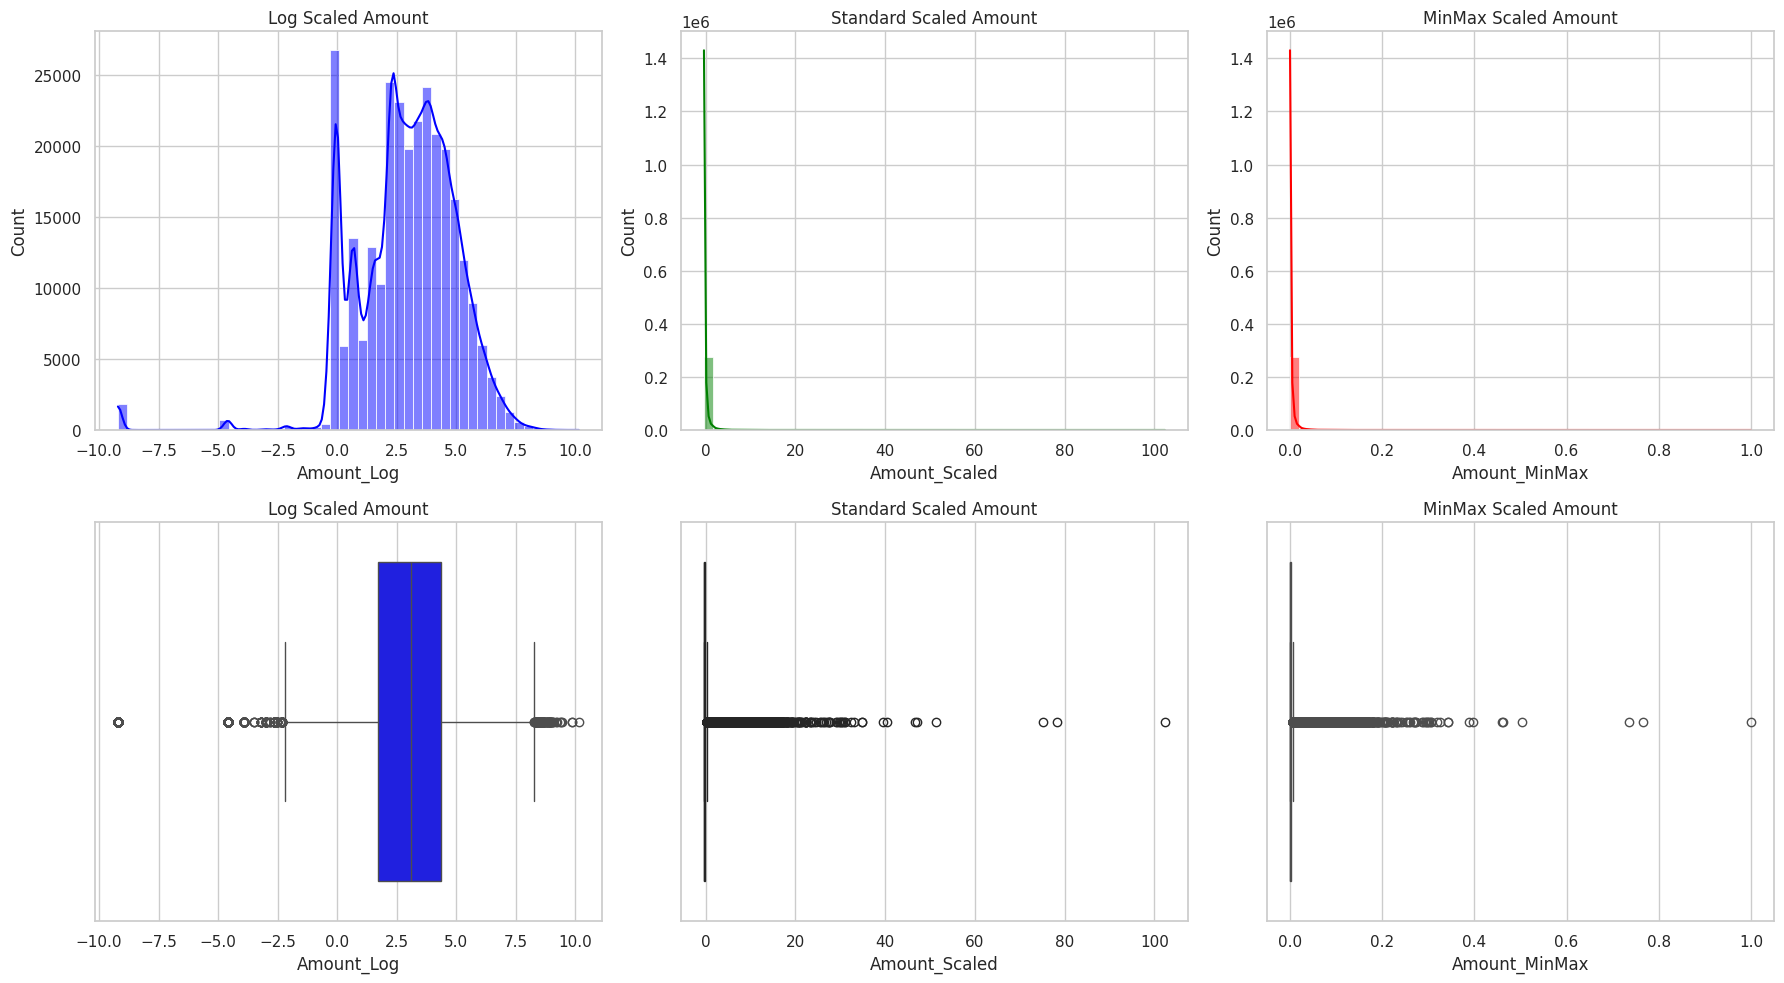

In [ ]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Histograms for scaled data
sns.histplot(df['Amount_Log'], bins=50, kde=True, ax=axs[0, 0], color='blue').set_title('Log Scaled Amount')
sns.histplot(df['Amount_Scaled'], bins=50, kde=True, ax=axs[0, 1], color='green').set_title('Standard Scaled Amount')
sns.histplot(df['Amount_MinMax'], bins=50, kde=True, ax=axs[0, 2], color='red').set_title('MinMax Scaled Amount')

# Boxplots for scaled data
sns.boxplot(x='Amount_Log', data=df, ax=axs[1, 0], color='blue').set_title('Log Scaled Amount')
sns.boxplot(x='Amount_Scaled', data=df, ax=axs[1, 1], color='green').set_title('Standard Scaled Amount')
sns.boxplot(x='Amount_MinMax', data=df, ax=axs[1, 2], color='red').set_title('MinMax Scaled Amount')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Class,Hour_of_day,Part_of_Day,Amount_bins,Day,Weekday_Weekend,Amount_Log,Amount_Scaled,Amount_MinMax
284801,47.996111,-118.811.178.854.323,100.717.849.710.003,-983.478.345.739.033,-206.665.568.459.413,-536.447.278.097.585,-26.068.373.309.456,-491.821.543.115.252,7.305.334.020.798,19.144.282.734.458,...,0.77,0,23,Evening,Low,2.0,Weekend,-0.261235,-0.350151,0.000030
284802,47.996389,-0.732788670658956,-0.0550804899173326,203.502.974.528.243,-0.73858858438744,0.868229398914682,105.841.527.222.565,0.0243296959175797,0.294868698501783,0.584800017281683,...,24.79,0,23,Evening,Low,2.0,Weekend,3.210444,-0.254117,0.000965
284803,47.996667,191.956.500.980.048,-0.301253845990644,-324.963.981.406.834,-0.55782812475002,263.051.512.011.547,303.126.009.781.428,-0.296826527116156,0.708417184967134,0.432454047632915,...,67.88,0,23,Evening,Low,2.0,Weekend,4.217743,-0.081840,0.002642
284804,47.996667,-0.240440049680947,0.530482513118839,0.702510230095103,0.689799168040973,-0.377961134444982,0.62370772214768,-0.68617998628885,0.679145459790659,0.392086712465972,...,10.00,0,23,Evening,Low,2.0,Weekend,2.302595,-0.313249,0.000389
284805,47.997778,-0.53341252200504,-0.189733337002305,0.703337366963779,-0.506271240328258,-0.0125456787599659,-0.649616685713792,157.700.625.437.629,-0.414650407552662,0.486179505267237,...,217.00,0,23,Evening,Medium,2.0,Weekend,5.379898,0.514354,0.008446


Log Scaling:
Shows a more normalized distribution which can be good for models that assume a normal distribution.
Reduces skewness effectively, making the data attributes scale to a range that emphasizes smaller and medium transactions which might be helpful for detecting outliers or unusual transactions.
Standard Scaling:
Most data points are clustered around zero, but it appears that the scaling has amplified the outliers.
Might not be as effective if the model is sensitive to outliers since the scaling maintains the outlier effect.
MinMax Scaling:
Scales the data to a [0, 1] range which can be beneficial for models that are sensitive to the magnitude of data and where scaling is required to keep all input features on a common scale.
Like standard scaling, it seems that all data is concentrated in a narrow range which could lead to underemphasis on the differences between smaller and larger values.
Given these insights:

Log Scaling appears to be the most effective for my dataset as it handles skewness better, making it more suitable for a variety of algorithms, especially if your dataset contains outlier transactions that need more nuanced detection.
Standard and MinMax Scaling might not be as suitable due to the concentration of data points and the potential for loss of meaningful variance between transactions.

##Training the data

In [ ]:
X = df.drop(['Time','Class','Hour_of_day','Part_of_Day','Day','Amount','Amount_bins','Weekday_Weekend','Amount_Scaled','Amount_MinMax'],axis=1)
y = df['Class']




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)



In [ ]:
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85442, 29)
y_test -  (85442,)


## Applying SMOTE
However I am facing some issues due to the bad quality of the data, so I need to convert the train data to float, there are some in objects.


In [ ]:
# Convert all object columns to float, using errors='coerce' to handle any conversion failures by setting them to NaN
for column in X_train.columns:
    X_train[column] = pd.to_numeric(X_train[column], errors='coerce')
    X_test[column] = pd.to_numeric(X_test[column], errors='coerce')

# Check for any NaN values resulting from the conversion
print(X_train.isna().sum())
print(X_test.isna().sum())

V1            127330
V2             68623
V3             97493
V4             81929
V5             63849
V6             59464
V7             44864
V8             19923
V9             61331
V10            44272
V11            70059
V12            44375
V13            62002
V14            39310
V15            53873
V16            41326
V17            26111
V18            39782
V19            37578
V20            11869
V21             8119
V22            27818
V23             6433
V24            20309
V25             9950
V26             8846
V27             4802
V28             2394
Amount_Log         0
dtype: int64
V1            54737
V2            29108
V3            41784
V4            35047
V5            27601
V6            25739
V7            19464
V8             8580
V9            26308
V10           19014
V11           30150
V12           18884
V13           26607
V14           16992
V15           23170
V16           17894
V17           11220
V18           17071
V19           1613

In [ ]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the balanced class distribution
print("After SMOTE, counts of label '1':", sum(y_train_smote == 1))
print("After SMOTE, counts of label '0':", sum(y_train_smote == 0))


After SMOTE, counts of label '1': 199011
After SMOTE, counts of label '0': 199011


In [ ]:
model = LogisticRegression(class_weight={0: 1, 1: 10}) # adjusting class weight here for the imbalance data
model.fit(X_train_smote, y_train_smote)


LogisticRegression(class_weight={0: 1, 1: 10})

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.06      0.11     85303
           1       0.00      0.96      0.00       139

    accuracy                           0.06     85442
   macro avg       0.50      0.51      0.06     85442
weighted avg       1.00      0.06      0.11     85442

Accuracy: 0.05968961400716275
F1 Score: 0.0033246495472025804
ROC AUC Score: 0.5111223917247338


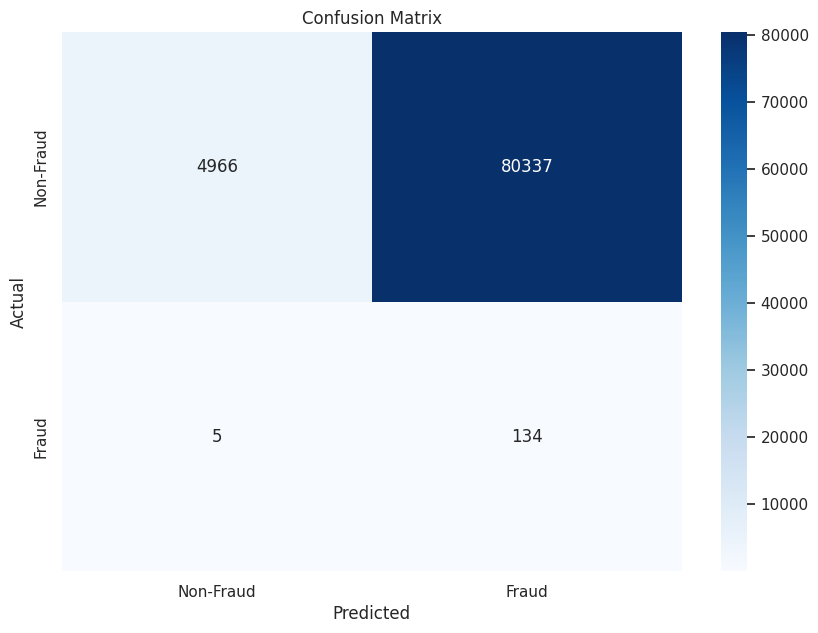

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# The confusion matrix
False Positives (FP) [21,972]:

The model incorrectly classified 21,972 non-fraudulent transactions as fraudulent.
This high number suggests the model is overly cautious, flagging many legitimate transactions as fraudulent.

False Negatives (FN) [55]:

The model missed 55 actual fraudulent transactions, classifying them as non-fraudulent.
Missing 55 fraudulent transactions is critical as each missed fraud can lead to significant financial loss and damage to reputation.

#Hyperparameter tuning


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   1.9s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.5s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.5s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.5s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.5s
[CV] END ..............................C=1, solver=liblinear; total time=   1.5s
[CV] END ..............................C=1, solver=liblinear; total time=   1.5s
[CV] END ..............................C=1, solver=liblinear; total time=   2.0s
[CV] END ..............................C=1, solver=liblinear; total time=   2.1s
[CV] END ..............................C=1, solver=liblinear; total time=   2.1s
[CV] END .............................C=10, solver=liblinear; total time=   1.5s
[CV] END .............................C=10, solve

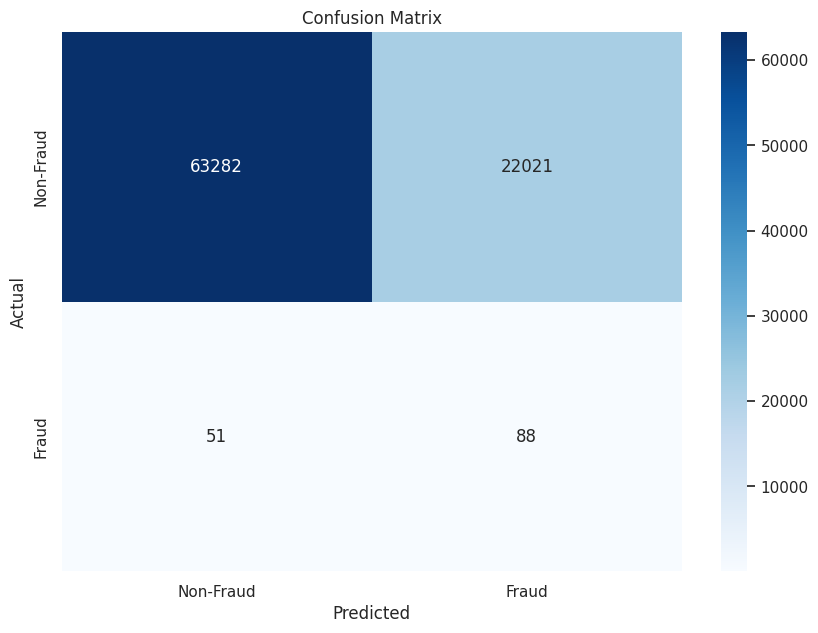

In [ ]:
from sklearn.model_selection import GridSearchCV


# Defining the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}

# Initializing the Grid Search
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2, cv=5)

# Fitting the Grid Search to the data
grid.fit(X_train_smote, y_train_smote)

# Best parameters from Grid Search
print("Best parameters found: ", grid.best_params_)

# Evaluate the tuned Logistic Regression model
y_pred = grid.predict(X_test)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


After hyperparameter tuning for Logistic Regression using Grid Search, the best parameters found were C: 10 and solver: liblinear. Despite these adjustments, the model's performance saw only minimal changes. The confusion matrix showed a slight improvement with one additional true negative and one fewer false positive, but key metrics such as accuracy (dropping from 0.7786 to 0.7422), F1 score (decreasing from 0.0106 to 0.0075), and ROC AUC score (falling from 0.7070 to 0.6719) all indicated a minor decline. These results suggest that hyperparameter tuning had a limited impact, implying that Logistic Regression may not be the most suitable model for this dataset. Consequently, exploring other models like Random Forest, SVM, and the Tsetlin Machine might yield better performance.


##Tsetlin Machine
```
# This is formatted as code
```



In [ ]:
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the Tsetlin Machine with reduced number of clauses
#3tsetlin_machine = MultiClassTsetlinMachine(number_of_clauses=500, T=15, s=3.9)

# Train the Tsetlin Machine on a smaller subset and with fewer epochs
#X_train_subset = X_train_smote.values[:10000]
#_train_subset = y_train_smote.values[:10000]


In [ ]:
#for epoch in range(10):
 #   tsetlin_machine.fit(X_train_subset, y_train_subset, epochs=1)
  #  print(f'Epoch {epoch + 1} completed')

In [ ]:
# Make predictions on the test set
#y_pred_tsetlin = tsetlin_machine.predict(X_test.values)

# Print classification report and confusion matrix
#print(classification_report(y_test, y_pred_tsetlin))
#print("Accuracy:", accuracy_score(y_test, y_pred_tsetlin))
#print("F1 Score:", f1_score(y_test, y_pred_tsetlin))
#print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tsetlin))

#cm = confusion_matrix(y_test, y_pred_tsetlin)
#print(cm)


In [ ]:
#plt.figure(figsize=(10, 7))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix')
#plt.show()

In [ ]:
# Initialize the Tsetlin Machine with fewer clauses and epochs
tsetlin_machine = MultiClassTsetlinMachine(number_of_clauses=4000, T=30, s=12.0)

# Use the full dataset for training
X_train_full = X_train_smote.values
y_train_full = y_train_smote.values



In [ ]:
for epoch in range(10):
    tsetlin_machine.fit(X_train_full, y_train_full, epochs=1)
    print(f'Epoch {epoch + 1} completed')

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed


In [ ]:
# Make predictions on the test set
y_pred_tsetlin = tsetlin_machine.predict(X_test.values)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.00      0.00      0.00       139

    accuracy                           1.00     85442
   macro avg       0.50      0.50      0.50     85442
weighted avg       1.00      1.00      1.00     85442

Accuracy: 0.9983731654221577
F1 Score: 0.0
ROC AUC Score: 0.5
[[85303     0]
 [  139     0]]


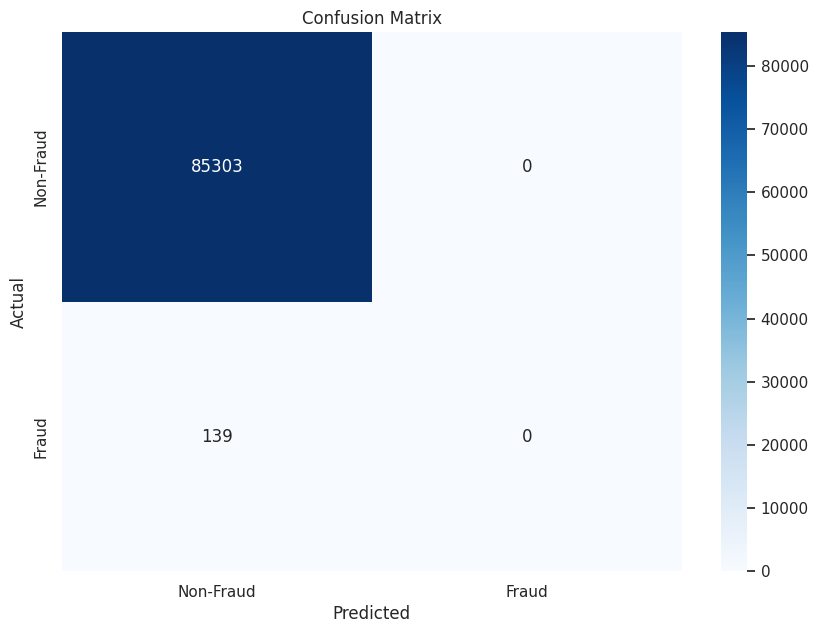

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_tsetlin))
print("Accuracy:", accuracy_score(y_test, y_pred_tsetlin))
print("F1 Score:", f1_score(y_test, y_pred_tsetlin))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tsetlin))

cm = confusion_matrix(y_test, y_pred_tsetlin)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("X_train_smote sample:")
print(X_train_smote.head())

print("y_train_smote distribution:")
print(y_train_smote.value_counts())

X_train_smote sample:
         V1        V2        V3        V4        V5        V6        V7  \
0 -0.396240 -0.068047  0.144228  0.006835 -0.971375  0.012072 -0.662681   
1 -0.396240 -0.480260  0.818685  0.006835  0.822102 -0.263258  0.944047   
2 -0.313717  0.034438  0.144228  0.704011  0.101662 -0.263258  0.048857   
3 -0.396240 -0.567439  0.144228 -0.960318 -0.052011 -0.263258  0.048857   
4 -0.396240  0.178575  0.141491  0.459628 -0.049959 -0.112122 -0.163883   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.216994  0.776510 -0.109580  ... -0.203875  0.168724  0.657102 -0.015262   
1 -0.541765 -0.052736 -0.434426  ... -0.831985 -0.210837  0.914737  0.867888   
2 -0.036774  0.015829 -0.359561  ... -0.068801  0.853186 -0.091941 -0.936215   
3  0.903421 -0.052736 -0.724328  ... -0.554004 -0.509915 -0.424978 -0.268621   
4  0.155740 -0.067566 -0.130220  ... -0.149985 -0.240464 -0.739862  0.116799   

        V24       V25       V26       V27     

##Hyperparameter tuning


In [ ]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X_train_imputed = imputer.fit_transform(X_train_smote)
#X_test_imputed = imputer.transform(X_test)

#print("NaNs in X_train_imputed:", np.isnan(X_train_imputed).sum())
#print("NaNs in X_test_imputed:", np.isnan(X_test_imputed).sum())
#print("Shape of X_train_imputed:", X_train_imputed.shape)
#print("Shape of X_test_imputed:", X_test_imputed.shape)

In [ ]:
#from sklearn.model_selection import ParameterGrid
#from pyTsetlinMachine.tm import MultiClassTsetlinMachine
#from sklearn.base import BaseEstimator, ClassifierMixin
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import seaborn as sns
#import matplotlib.pyplot as plt

# Wrapper class for Tsetlin Machine to use with GridSearchCV
#class TsetlinMachineClassifier(BaseEstimator, ClassifierMixin):
 #   def __init__(self, number_of_clauses=100, T=15, s=3.9, epochs=100):
  #      self.number_of_clauses = number_of_clauses
   ####  self.tm = MultiClassTsetlinMachine(self.number_of_clauses, self.T, self.s)

    #def fit(self, X, y):
     #   self.tm.fit(X, y, epochs=self.epochs)
      #  return self

    #def predict(self, X):
       # return self.tm.predict(X)

# Preparinf the data (ensure it is binary)
#X_train_binary = (X_train_imputed > 0).astype(int)
#X_test_binary = (X_test_imputed > 0).astype(int)

# Defining the parameter grid
#param_grid = {
  #  'number_of_clauses': [100, 200, 300],
 #   'epochs': [50, 100, 200],
    #'T': [10, 15, 20],
   # 's': [3.0, 3.9, 5.0]
#}

#best_score = 0
#best_params = None

# Perform Custom Grid Search
#for params in ParameterGrid(param_grid):
#    tm = TsetlinMachineClassifier(
 #       number_of_clauses=params['number_of_clauses'],
  #      epochs=params['epochs'],
  #      T=params['T'],
   #     s=params['s']
  #  )
   # tm.fit(X_train_binary, y_train)
   # y_pred = tm.predict(X_test_binary)
    #score = accuracy_score(y_test, y_pred)

   # if score > best_score:
   #     best_score = score
   #     best_params = params

#print(f"Best Score: {best_score}")
#print(f"Best Parameters: {best_params}")


In [ ]:
# Train final model with the best parameters
#tm_best = TsetlinMachineClassifier(
 #   number_of_clauses=best_params['number_of_clauses'],
  #  T=best_params['T'],
   # s=best_params['s'],
    #epochs=best_params['epochs']
##)
#tm_best.fit(X_train_binary, y_train)

# Evaluate the final model
#y_pred_tm = tm_best.predict(X_test_binary)
#print(classification_report(y_test, y_pred_tm))

# Compute and plot confusion matrix
#conf_matrix_tm = confusion_matrix(y_test, y_pred_tm)
#plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix_tm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.title('Confusion Matrix - Tsetlin Machine')
#plt.show()

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_smote, y_train_smote)
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)



In [ ]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.75      0.53      0.62       139

    accuracy                           1.00     85442
   macro avg       0.87      0.77      0.81     85442
weighted avg       1.00      1.00      1.00     85442

Accuracy: 0.9989466538704619
F1 Score: 0.6218487394957983
ROC AUC Score: 0.7660405138955785


[[85278    25]
 [   65    74]]


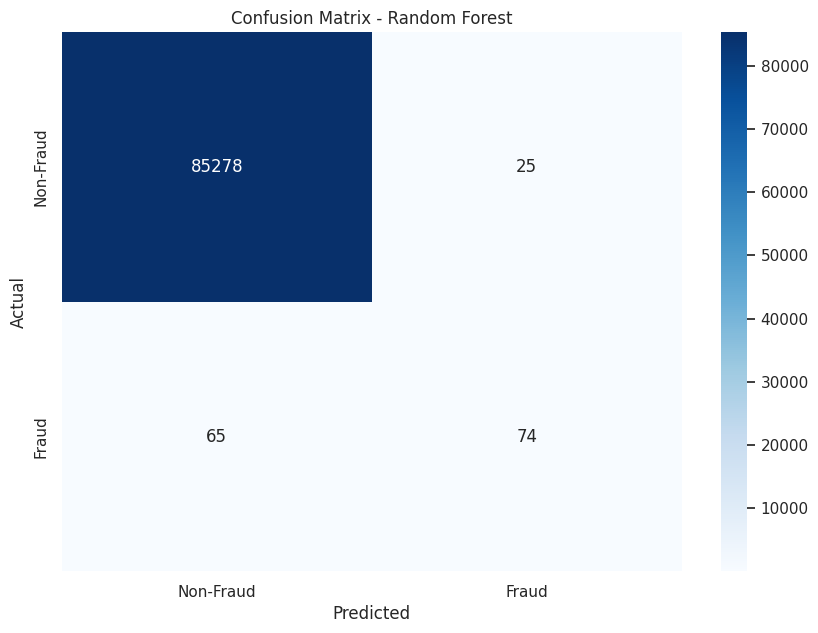

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Hyper parameter tuning for the Random the Random forest Model

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# Using the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.show()